In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# Load the data from csv to dataframes using Pandas
team_Data = pd.read_csv("Resources/teamData.csv") 
player_Data = pd.read_csv("Resources/playerData.csv")
cross_ref = pd.read_csv("Resources/crossReference.csv")

In [3]:
# team_Data comprises of teams with their winning percentages for all years
team_Data.head()

,Year,Team,Record,Winning Percentage
0,1964,76ers,34-46,0.425
1,1965,76ers,40-40,0.500
2,1966,76ers,55-25,0.688
3,1967,76ers,68-13,0.840
4,1968,76ers,62-20,0.756


In [4]:
# player_Data comprises of player's stats from all years
player_Data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,10,1950.0,Charlie Black,F-C,28.0,AND,29.0,NaN,NaN,NaN,...,0.688,NaN,NaN,NaN,88.0,NaN,NaN,NaN,133.0,279.0
1,19,1950.0,Frankie Brian,G,26.0,AND,64.0,NaN,NaN,NaN,...,0.824,NaN,NaN,NaN,189.0,NaN,NaN,NaN,192.0,1138.0
2,31,1950.0,Jake Carter,F-C,25.0,AND,11.0,NaN,NaN,NaN,...,0.667,NaN,NaN,NaN,8.0,NaN,NaN,NaN,32.0,38.0
3,37,1950.0,Bill Closs,SF,28.0,AND,64.0,NaN,NaN,NaN,...,0.718,NaN,NaN,NaN,160.0,NaN,NaN,NaN,190.0,752.0
4,73,1950.0,Frank Gates,G,29.0,AND,64.0,NaN,NaN,NaN,...,0.622,NaN,NaN,NaN,91.0,NaN,NaN,NaN,147.0,287.0


In [5]:
# cross_ref comprises of Team and their corresponding city initials
cross_ref.head()

,Team,TM
0,76ers,PHI
1,Blackhawks,TRI
2,Bobcats,CHA
3,Bommers,STB
4,Braves,BLB


In [6]:
# Merge team_Data and cross_ref to get city initials for all the teams
combined_team_data = pd.merge(team_Data, cross_ref, on="Team")
combined_team_data.head()

,Year,Team,Record,Winning Percentage,TM
0,1964,76ers,34-46,0.425,PHI
1,1965,76ers,40-40,0.500,PHI
2,1966,76ers,55-25,0.688,PHI
3,1967,76ers,68-13,0.840,PHI
4,1968,76ers,62-20,0.756,PHI


In [7]:
# Filter combined_team_data for required seasons - from 1986 to 2017
combined_team_data = combined_team_data.loc[(combined_team_data["Year"] >= 1986) & (combined_team_data["Year"]< 2018)]
combined_team_data.head()

,Year,Team,Record,Winning Percentage,TM
22,1986,76ers,54-28,0.659,PHI
23,1987,76ers,45-37,0.549,PHI
24,1988,76ers,36-46,0.439,PHI
25,1989,76ers,46-36,0.561,PHI
26,1990,76ers,53-29,0.646,PHI


In [8]:
# Taking player Dataframe from 1986 till 2017
# Change datatype of Year to Int
player_Data = player_Data.loc[(player_Data["Year"] >= 1986.0) & (player_Data["Year"]< 2018.0)]
player_Data["Year"] = player_Data["Year"].astype(int)
player_Data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
263,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,0.728,12.0,50.0,62.0,74.0,23.0,3.0,47.0,80.0,277.0
264,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,0.667,16.0,36.0,52.0,14.0,7.0,15.0,14.0,51.0,116.0
265,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,0.667,13.0,26.0,39.0,8.0,2.0,6.0,18.0,37.0,122.0
266,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,0.864,2.0,17.0,19.0,112.0,13.0,0.0,38.0,32.0,144.0
267,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,0.857,44.0,80.0,124.0,26.0,14.0,8.0,40.0,118.0,193.0


In [9]:
# Create a complete NBA dataframe by merging player_data and combined_team_data on year and team initials
complete_nba_data = pd.merge(player_Data, combined_team_data, left_on=["Tm","Year"], right_on=["TM","Year"])
complete_nba_data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,Team,Record,Winning Percentage,TM
0,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,74.0,23.0,3.0,47.0,80.0,277.0,Hawks,50-32,0.61,ATL
1,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,14.0,7.0,15.0,14.0,51.0,116.0,Hawks,50-32,0.61,ATL
2,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,8.0,2.0,6.0,18.0,37.0,122.0,Hawks,50-32,0.61,ATL
3,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,112.0,13.0,0.0,38.0,32.0,144.0,Hawks,50-32,0.61,ATL
4,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,26.0,14.0,8.0,40.0,118.0,193.0,Hawks,50-32,0.61,ATL


# Question 1

## Can the Team Four Factor Rating of Basketball help in accurately determining the team’s win/success?

- We are using about ~30 years of data - 1986 till 2017
- Using this organized data we can plot individual scatter plots for win% against each of these factors to see how they correlate with it.
  Plot win% against Team Four Factor Rating for a selected team.
- Plot a line regression which will determine how Team Four Factor Rating has a correlation with win% of the team.
- Predict win% for 2017 data using our four factor formula.
- Check the actual win% of the team from the 2017 data and determine the accuracy of our prediction.

        Four Factors are:
        * Shooting – Effective Field Goal % - eFG% - (40%)
        * Turnover – Turnover Rate % - TOV% - (25%)
        * Rebound – Offensive Rebound Rate % - ORB% - (20%)
        * Free Throw – Free Throw Rate – FT% - (15%)

        Team Four Factor Rating Formula = ((0.4*eFG%) – (0.25*TOV%) + (0.2*ORB%) + (0.15*FT%))

In [10]:
# Creating a new dataframe with just the required columns for Four Factor Analysis
four_factor = complete_nba_data[["Year","Player","TM","eFG%","TOV%","ORB%","FT%","Winning Percentage"]]
four_factor["eFG%"] = four_factor["eFG%"]*100
four_factor.head()

C:\Users\Jay D\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage
0,1986,John Battle,ATL,45.5,15.0,2.1,0.728,0.61
1,1986,Antoine Carr,ATL,52.7,11.8,6.9,0.667,0.61
2,1986,Lorenzo Charles,ATL,55.7,14.8,5.3,0.667,0.61
3,1986,Johnny Davis,ATL,43.5,22.2,0.6,0.864,0.61
4,1986,Scott Hastings,ATL,41.8,17.4,7.5,0.857,0.61


In [11]:
# Calculate Four Factor Rating based on its formula and add back into dataframe
# Team's Four Factor Rating = 40% Effective Field Goal - 25% Turnover Rate % + 20% Offensive Rebounds + 15% Free Throw Rate
four_factor["Four Factor Ratings"] = round(((0.4*four_factor["eFG%"]) 
                                      - (0.25*four_factor["TOV%"]) 
                                      + (0.2*four_factor["ORB%"]) 
                                      + (0.15*four_factor["FT%"])),3)

four_factor.head()

C:\Users\Jay D\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
0,1986,John Battle,ATL,45.5,15.0,2.1,0.728,0.61,14.979
1,1986,Antoine Carr,ATL,52.7,11.8,6.9,0.667,0.61,19.610
2,1986,Lorenzo Charles,ATL,55.7,14.8,5.3,0.667,0.61,19.740
3,1986,Johnny Davis,ATL,43.5,22.2,0.6,0.864,0.61,12.100
4,1986,Scott Hastings,ATL,41.8,17.4,7.5,0.857,0.61,13.999


In [12]:
# Groupby teams and years to get stats for each team over the years
# This will be the final dataframe that we used to properly build our conclusions for the questions above
team_data_30seasons = four_factor.groupby(["TM","Year"]).mean()
team_data_30seasons = team_data_30seasons.round(3)
team_data_30seasons

eFG%    TOV%   ORB%    FT%  Winning Percentage  \
TM  Year                                                     
ATL 1986  47.450  17.325  5.606  0.753               0.610   
    1987  43.747  16.253  7.140  0.751               0.695   
    1988  50.220  14.667  6.160  0.739               0.610   
    1989  45.615  16.038  6.431  0.745               0.634   
    1990  45.372  12.317  5.444  0.752               0.500   
...          ...     ...    ...    ...                 ...   
WSB 1993  50.468  13.900  9.116  0.708               0.268   
    1994  44.900  15.184  6.140  0.751               0.293   
    1995  47.431  15.200  5.962  0.727               0.256   
    1996  49.605  13.390  7.890  0.731               0.476   
    1997  46.240  18.387  7.253  0.691               0.537   

          Four Factor Ratings  
TM  Year                       
ATL 1986               15.883  
    1987               16.632  
    1988               17.764  
    1989               16.512  
    1990               17.222  
...                       ...  
WSB 1993               17.449  
    1994               16.845  
    1995               16.474  
    1996               17.757  
    1997               16.754  

[905 rows x 6 columns]

# Question 1 Analysis

In [13]:
# Finding Linear Regression for Effective Field Goal and Winning Percentage
x_axis_efg = team_data_30seasons["eFG%"]
y_axis_efg = team_data_30seasons["Winning Percentage"]

(slope_efg, intercept_efg, r_value_efg, p_value_efg, std_err_efg) = stats.linregress(x_axis_efg,y_axis_efg)

# Line equation to find Predcited winning percentages
regress_value_efg = slope_efg*x_axis_efg + intercept_efg

# Calculate coefficeint of Determination
r_squared_efg = (round(r_value_efg,3))*(round(r_value_efg,3))

# Line equation to print on the scatter plot
line_eq_efg = "y = " + str(round(slope_efg,2)) + "x + " + str(round(intercept_efg,2))

# Print Coefficient of Correlation and Coefficient of Determination 
if r_value_efg > 0:
    print(f"Coefficient of Correlation r = {round(r_value_efg,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_efg,3)}\n"
          f"There is a positive correlation between Effective Field Goal and Winning percentages")
elif r_value_efg < 0:
    print(f"Coefficient of Correlation r =  {round(r_value_efg,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_efg,3)}\n"
          f"There is a negative correlation between Effective Field Goal and Winning percentages")
else:
    print(f"Coefficient of Correlation r =  {round(r_value_efg,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_efg,3)}\n"
          f"There is a no concrete correlation between Effective Field Goal and Winning percentages") 

Coefficient of Correlation r = 0.296
Coefficient of Determination r-squared = 0.088
There is a positive correlation between Effective Field Goal and Winning percentages


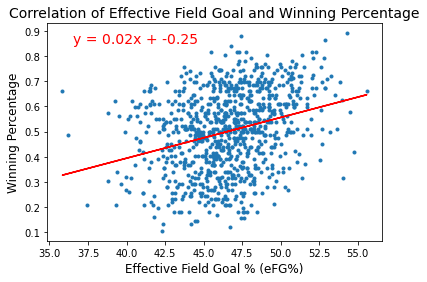

In [14]:
# Scatter plot of Effective Field Goal against winning%
plt.scatter(x_axis_efg, y_axis_efg, marker='.')

# Line plot for regerssion line
plt.plot(x_axis_efg,regress_value_efg, "r-")

# Display regression line
plt.annotate(line_eq_efg,(36.5,0.85), fontsize=14, color="red")

# Labels and Titles for the plot
plt.xlabel("Effective Field Goal % (eFG%)", fontsize=12)
plt.ylabel("Winning Percentage", fontsize=12)
plt.title("Correlation of Effective Field Goal and Winning Percentage", fontsize=14)

# Saving scatter plot graph into visualization folder
plt.savefig("Visualizations/Correlation of Effective Field Goal and Winning Percentage.jpg")

# Display plot
plt.show()

In [15]:
# Finding Linear Regression for Turnover Rate and Winning Percentage
x_axis_tov = team_data_30seasons["TOV%"]
y_axis_tov = team_data_30seasons["Winning Percentage"]

(slope_tov, intercept_tov, r_value_tov, p_value_tov, std_err_tov) = stats.linregress(x_axis_tov,y_axis_tov)

# Line equation to find Predcited winning percentages
regress_value_tov = slope_tov*x_axis_tov + intercept_tov

# Calculate coefficeint of Determination
r_squared_tov = (round(r_value_tov,3))*(round(r_value_tov,3))

# Line equation to print on the scatter plot
line_eq_tov = "y = " + str(round(slope_tov,2)) + "x + " + str(round(intercept_tov,2))

# Print Coefficient of Correlation and Coefficient of Determination 
if r_value_tov > 0:
    print(f"Coefficient of Correlation r = {round(r_value_tov,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_tov,3)}\n"
          f"There is a positive correlation between Turnover Rate and Winning percentages")
elif r_value_tov < 0:
    print(f"Coefficient of Correlation r =  {round(r_value_tov,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_tov,3)}\n"
          f"There is a negative correlation between Turnover Rate and Winning percentages")
else:
    print(f"Coefficient of Correlation r =  {round(r_value_tov,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_tov,3)}\n"
          f"There is a no concrete correlation between Turnover and Winning percentages")

Coefficient of Correlation r =  -0.092
Coefficient of Determination r-squared = 0.008
There is a negative correlation between Turnover Rate and Winning percentages


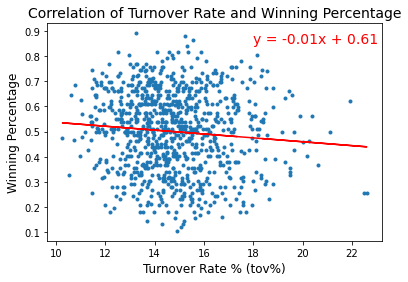

In [16]:
# Scatter plot of Turnover Rate against winning%
plt.scatter(x_axis_tov, y_axis_tov, marker='.')

# Line plot for regerssion line
plt.plot(x_axis_tov,regress_value_tov, "r-")

# Display regression line
plt.annotate(line_eq_tov,(18,0.85), fontsize=14, color="red")

# Labels and Titles for the plot
plt.xlabel("Turnover Rate % (tov%)", fontsize=12)
plt.ylabel("Winning Percentage", fontsize=12)
plt.title("Correlation of Turnover Rate and Winning Percentage", fontsize=14)

# Saving scatter plot graph into visualization folder
plt.savefig("Visualizations/Correlation of Tunrover Rate and Winning Percentage.jpg")

# Display plot
plt.show()

In [17]:
# Finding Linear Regression for Offensive Rebound and Winning Percentage
x_axis_orb = team_data_30seasons["ORB%"]
y_axis_orb = team_data_30seasons["Winning Percentage"]

(slope_orb, intercept_orb, r_value_orb, p_value_orb, std_err_orb) = stats.linregress(x_axis_orb,y_axis_orb)

# Line equation to find Predcited winning percentages
regress_value_orb = slope_orb*x_axis_orb + intercept_orb

# Calculate coefficeint of Determination
r_squared_orb = (round(r_value_orb,3))*(round(r_value_orb,3))

# Line equation to print on the scatter plot
line_eq_orb = "y = " + str(round(slope_orb,2)) + "x + " + str(round(intercept_orb,2))

# Print Coefficient of Correlation and Coefficient of Determination 
if r_value_orb > 0:
    print(f"Coefficient of Correlation r = {round(r_value_orb,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_orb,3)}\n"
          f"There is a positive correlation between Offensive Rebound and Winning percentages")
elif r_value_orb < 0:
    print(f"Coefficient of Correlation r =  {round(r_value_orb,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_orb,3)}\n"
          f"There is a negative correlation between Offensive Rebound and Winning percentages")
else:
    print(f"Coefficient of Correlation r =  {round(r_value_orb,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_orb,3)}\n"
          f"There is a no concrete correlation between Offensive Rebound and Winning percentages")

Coefficient of Correlation r = 0.063
Coefficient of Determination r-squared = 0.004
There is a positive correlation between Offensive Rebound and Winning percentages


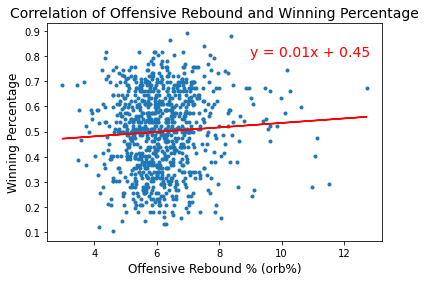

In [18]:
# Scatter plot of Offensive Rebound against winning%
plt.scatter(x_axis_orb, y_axis_orb, marker='.')

# Line plot for regerssion line
plt.plot(x_axis_orb,regress_value_orb, "r-")

# Display regression line
plt.annotate(line_eq_orb,(9,0.8), fontsize=14, color="red")

# Labels and Titles for the plot
plt.xlabel("Offensive Rebound % (orb%)", fontsize=12)
plt.ylabel("Winning Percentage", fontsize=12)
plt.title("Correlation of Offensive Rebound and Winning Percentage", fontsize=14)

# Saving scatter plot graph into visualization folder
plt.savefig("Visualizations/Correlation of Offensive Rebound and Winning Percentage.jpg")

# Display plot
plt.show()

In [19]:
# Finding Linear Regression for Free Throw Rate and Winning Percentage
x_axis_ft = team_data_30seasons["FT%"]
y_axis_ft = team_data_30seasons["Winning Percentage"]

(slope_ft, intercept_ft, r_value_ft, p_value_ft, std_err_ft) = stats.linregress(x_axis_ft,y_axis_ft)

# Line equation to find Predcited winning percentages
regress_value_ft = slope_ft*x_axis_ft + intercept_ft

# Calculate coefficeint of Determination
r_squared_ft = (round(r_value_ft,3))*(round(r_value_ft,3))

# Line equation to print on the scatter plot
line_eq_ft = "y = " + str(round(slope_ft,2)) + "x + " + str(round(intercept_ft,2))

# Print Coefficient of Correlation and Coefficient of Determination 
if r_value_ft > 0:
    print(f"Coefficient of Correlation r = {round(r_value_ft,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_ft,3)}\n"
          f"There is a positive correlation between Free Throw Rate and Winning percentages")
elif r_value_ft < 0:
    print(f"Coefficient of Correlation r =  {round(r_value_ft,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_ft,3)}\n"
          f"There is a negative correlation between Free Throw Rate and Winning percentages")
else:
    print(f"Coefficient of Correlation r =  {round(r_value_ft,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_ft,3)}\n"
          f"There is a no concrete correlation between Free Throw Rate and Winning percentages")

Coefficient of Correlation r = 0.074
Coefficient of Determination r-squared = 0.005
There is a positive correlation between Free Throw Rate and Winning percentages


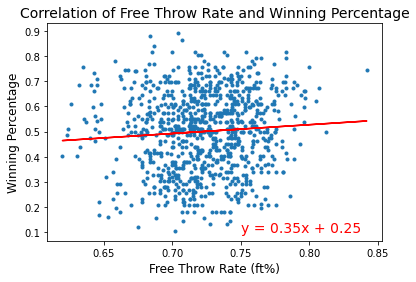

In [20]:
# Scatter plot of Free Throw Rate against winning%
plt.scatter(x_axis_ft, y_axis_ft, marker='.')

# Line plot for regerssion line
plt.plot(x_axis_ft,regress_value_ft, "r-")

# Display regression line
plt.annotate(line_eq_ft,(0.75,0.1), fontsize=14, color="red")

# Labels and Titles for the plot
plt.xlabel("Free Throw Rate (ft%)", fontsize=12)
plt.ylabel("Winning Percentage", fontsize=12)
plt.title("Correlation of Free Throw Rate and Winning Percentage", fontsize=14)

# Saving scatter plot graph into visualization folder
plt.savefig("Visualizations/Correlation of Free Throw Rate and Winning Percentage.jpg")

# Display plot
plt.show()

In [21]:
# Finding Linear Regression for Four Factor Rating and Winning Percentage

x_axis_4ff = team_data_30seasons["Four Factor Ratings"]
y_axis_4ff = team_data_30seasons["Winning Percentage"]

(slope_4ff, intercept_4ff, r_value_4ff, p_value_4ff, std_err_4ff) = stats.linregress(x_axis_4ff,y_axis_4ff)

# Line equation to find Predcited winning percentages
regress_value_4ff = slope_4ff*x_axis_4ff + intercept_4ff

# Calculate coefficeint of Determination
r_squared_4ff = (round(r_value_4ff,3))*(round(r_value_4ff,3))

# Line equation to print on the scatter plot
line_eq_4ff = "y = " + str(round(slope_4ff,2)) + "x + " + str(round(intercept_4ff,2))

# Print Coefficient of Correlation and Coefficient of Determination 
if r_value_4ff > 0:
    print(f"Coefficient of Correlation r = {round(r_value_4ff,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_4ff,3)}\n"
          f"There is a positive correlation between Four Factor Rating and Winning percentages")
elif r_value_4ff < 0:
    print(f"Coefficient of Correlation r =  {round(r_value_4ff,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_4ff,3)}\n"
          f"There is a negative correlation between Four Factor Rating and Winning percentages")
else:
    print(f"Coefficient of Correlation r =  {round(r_value_4ff,3)}\n"
          f"Coefficient of Determination r-squared = {round(r_squared_4ff,3)}\n"
          f"There is a no concrete correlation between Four Factor Rating and Winning percentages")

Coefficient of Correlation r = 0.377
Coefficient of Determination r-squared = 0.142
There is a positive correlation between Four Factor Rating and Winning percentages


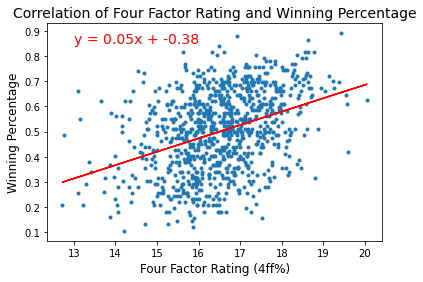

In [22]:
# Scatter plot of Four Factor Rating against winning%
plt.scatter(x_axis_4ff, y_axis_4ff, marker='.')

# Line plot for regerssion line
plt.plot(x_axis_4ff,regress_value_4ff, "r-")

# Display regression line
plt.annotate(line_eq_4ff,(13,0.85), fontsize=14, color="red")

# Labels and Titles for the plot
plt.xlabel("Four Factor Rating (4ff%)", fontsize=12)
plt.ylabel("Winning Percentage", fontsize=12)
plt.title("Correlation of Four Factor Rating and Winning Percentage", fontsize=14)

# Saving scatter plot graph into visualization folder
plt.savefig("Visualizations/Correlation of Four Factor Rating and Winning Percentage.jpg")

# Display plot
plt.show()

# Residual Analysis


In [23]:
# Calculate Predicted Winning Percentage based on the line equation from the regression of Four Factor Data and winning percentages 
team_data_30seasons["Predicted Winning Percentage"] = round(((slope_4ff * team_data_30seasons["Four Factor Ratings"]) + 
                                                             intercept_4ff),3)
team_data_30seasons

eFG%    TOV%   ORB%    FT%  Winning Percentage  \
TM  Year                                                     
ATL 1986  47.450  17.325  5.606  0.753               0.610   
    1987  43.747  16.253  7.140  0.751               0.695   
    1988  50.220  14.667  6.160  0.739               0.610   
    1989  45.615  16.038  6.431  0.745               0.634   
    1990  45.372  12.317  5.444  0.752               0.500   
...          ...     ...    ...    ...                 ...   
WSB 1993  50.468  13.900  9.116  0.708               0.268   
    1994  44.900  15.184  6.140  0.751               0.293   
    1995  47.431  15.200  5.962  0.727               0.256   
    1996  49.605  13.390  7.890  0.731               0.476   
    1997  46.240  18.387  7.253  0.691               0.537   

          Four Factor Ratings  Predicted Winning Percentage  
TM  Year                                                     
ATL 1986               15.883                         0.467  
    1987               16.632                         0.507  
    1988               17.764                         0.567  
    1989               16.512                         0.500  
    1990               17.222                         0.538  
...                       ...                           ...  
WSB 1993               17.449                         0.550  
    1994               16.845                         0.518  
    1995               16.474                         0.498  
    1996               17.757                         0.566  
    1997               16.754                         0.513  

[905 rows x 7 columns]

In [24]:
# Calculate residuals which is difference between observed and predicted data
team_data_30seasons["Residuals"] = (team_data_30seasons["Winning Percentage"] - 
                                    team_data_30seasons["Predicted Winning Percentage"])
team_data_30seasons

eFG%    TOV%   ORB%    FT%  Winning Percentage  \
TM  Year                                                     
ATL 1986  47.450  17.325  5.606  0.753               0.610   
    1987  43.747  16.253  7.140  0.751               0.695   
    1988  50.220  14.667  6.160  0.739               0.610   
    1989  45.615  16.038  6.431  0.745               0.634   
    1990  45.372  12.317  5.444  0.752               0.500   
...          ...     ...    ...    ...                 ...   
WSB 1993  50.468  13.900  9.116  0.708               0.268   
    1994  44.900  15.184  6.140  0.751               0.293   
    1995  47.431  15.200  5.962  0.727               0.256   
    1996  49.605  13.390  7.890  0.731               0.476   
    1997  46.240  18.387  7.253  0.691               0.537   

          Four Factor Ratings  Predicted Winning Percentage  Residuals  
TM  Year                                                                
ATL 1986               15.883                         0.467      0.143  
    1987               16.632                         0.507      0.188  
    1988               17.764                         0.567      0.043  
    1989               16.512                         0.500      0.134  
    1990               17.222                         0.538     -0.038  
...                       ...                           ...        ...  
WSB 1993               17.449                         0.550     -0.282  
    1994               16.845                         0.518     -0.225  
    1995               16.474                         0.498     -0.242  
    1996               17.757                         0.566     -0.090  
    1997               16.754                         0.513      0.024  

[905 rows x 8 columns]

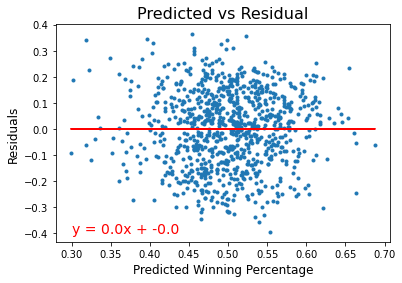

In [25]:
# Finding Linear Regression for Residuals and Predicted values

x_axis_residual = team_data_30seasons["Predicted Winning Percentage"]
y_axis_residual = team_data_30seasons["Residuals"]

(slope_residual, intercept_residual, r_value_residual, p_value_residual, std_err_residual) = stats.linregress(x_axis_residual,y_axis_residual)

# Line equation
regress_value_residual = slope_residual*x_axis_residual + intercept_residual

# Line equation to print on the scatter plot
line_eq_residual = "y = " + str(round(slope_residual,2)) + "x + " + str(round(intercept_residual,2))

# Scatter plot of residual and predicted values
plt.scatter(x_axis_residual, y_axis_residual, marker='.')

# Display regression line
plt.annotate(line_eq_residual,(0.3,-0.4), fontsize=14, color="red")

# Line plot for regerssion line
plt.plot(x_axis_residual,regress_value_residual, "r-")

# Labels and Titles for the plot
plt.xlabel("Predicted Winning Percentage", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Predicted vs Residual", fontsize=16)

# Saving scatter plot graph into visualization folder
plt.savefig("Visualizations/Residual vs Predicted values.jpg")

# Display plot
plt.show()

In [26]:
# Here we are grabbing the 2017 values so we can compare to the previous years
season_data_2017 = four_factor.loc[(four_factor["Year"] > 2016.0)]
season_data_2017                                       

,Year,Player,TM,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
521,2017,Kent Bazemore,ATL,47.3,13.6,2.6,0.708,0.575,16.146
522,2017,DeAndre' Bembry,ATL,48.5,13.2,4.2,0.375,0.575,16.996
523,2017,Jose Calderon,ATL,47.4,19.9,3.2,0.875,0.575,14.756
524,2017,Malcolm Delaney,ATL,40.7,18.1,1.0,0.806,0.575,12.076
525,2017,Mike Dunleavy,ATL,56.5,9.0,3.1,0.846,0.575,21.097
...,...,...,...,...,...,...,...,...,...
15062,2017,Otto Porter,WAS,60.8,4.8,5.1,0.832,0.535,24.265
15063,2017,Tomas Satoransky,WAS,44.9,19.1,3.9,0.697,0.535,14.070
15064,2017,Jason Smith,WAS,58.5,14.2,6.8,0.686,0.535,21.313
15065,2017,Marcus Thornton,WAS,46.7,10.1,4.3,0.852,0.535,17.143


In [27]:
# Grouby team in order to get the averages for the team
team_data_2017 = season_data_2017.groupby("TM").mean()
team_data_2017.head()

,Year,eFG%,TOV%,ORB%,FT%,Winning Percentage,Four Factor Ratings
TM,,,,,,,
ATL,2017,47.430000,12.385000,3.915000,0.733100,0.575,16.768650
BOS,2017,53.966667,11.013333,5.513333,0.715533,0.625,20.043467
BRK,2017,49.576190,13.828571,4.428571,0.764571,0.214,17.373762
CHI,2017,45.683333,11.050000,4.400000,0.741706,0.477,17.466176
CHO,2017,46.957895,11.868421,5.342105,0.760833,0.512,17.562222


In [28]:
# Add two columns that we can use to add the 4ff rating and difference in winning percentages
team_data_2017["Predicted Winning Percentage"] = (slope_4ff * team_data_2017["Four Factor Ratings"]) + intercept_4ff

team_data_2017["Difference in Winning Percentages"] = (team_data_2017["Winning Percentage"] - 
                                                       team_data_2017["Predicted Winning Percentage"])*100

In [29]:
# Building a summary dataframe
prediction_analysis_2017 = team_data_2017[["Four Factor Ratings", 
                                           "Predicted Winning Percentage", 
                                           "Winning Percentage", 
                                           "Difference in Winning Percentages"]]
prediction_analysis_2017.head()

,Four Factor Ratings,Predicted Winning Percentage,Winning Percentage,Difference in Winning Percentages
TM,,,,
ATL,16.768650,0.513997,0.575,6.100291
BOS,20.043467,0.687835,0.625,-6.283519
BRK,17.373762,0.546118,0.214,-33.211843
CHI,17.466176,0.551024,0.477,-7.402410
CHO,17.562222,0.556123,0.512,-4.412253


In [30]:
# Print a list of all the teams in 2016-2017 game year
print("Here are the teams for 2017:")
for i in range(len(prediction_analysis_2017.index)):
    print(prediction_analysis_2017.index[i])

Here are the teams for 2017:
ATL
BOS
BRK
CHI
CHO
CLE
DAL
DEN
DET
GSW
HOU
IND
LAC
LAL
MEM
MIA
MIL
MIN
NOP
OKC
ORL
PHI
PHO
POR
SAC
SAS
TOR
UTA
WAS


In [47]:
# User input to find results for a specific team and compare it to its previous seasons if they exist
user_team = input(f"For Prediction Analysis, please enter your team from Season 2017: ")

for tm,data in prediction_analysis_2017.iterrows():
    if tm == user_team:
        print(f"Actual Winning Percentage for {user_team} is: {data[2].round(decimals=3)}\n"
              f"Predicted Winning Percentage for {user_team} is: {data[1].round(decimals=3)}\n"
              f"The difference in winning percentages is: {data[3].round(decimals=3)}%")

For Prediction Analysis, please enter your team from Season 2017: BOS
Actual Winning Percentage for BOS is: 0.625
Predicted Winning Percentage for BOS is: 0.688
The difference in winning percentages is: -6.284%


# Question 2

## How does age of the player affect PER (Player Efficiency Rating)?

- Plot PER (y-axis) vs Age (x-axis).
- Plot a linear regression to determine correlation between player’s efficiency and age.
- Predict player’s efficiency based on their age.


In [32]:
# Selecting the proper columns for our dataframe
# To eliminate some of the "worse" players we want to take the top 75%
# that is why we include the G (Games played) and MP (Minutes Played) so we can filter 
# based on certain values 
age_player_data =  complete_nba_data[["Year","Player","Age","G","MP","PER"]]
age_player_data

,Year,Player,Age,G,MP,PER
0,1986,John Battle,23.0,64.0,639.0,11.7
1,1986,Antoine Carr,24.0,17.0,258.0,14.4
2,1986,Lorenzo Charles,22.0,36.0,273.0,11.5
3,1986,Johnny Davis,30.0,27.0,402.0,13.9
4,1986,Scott Hastings,25.0,62.0,650.0,7.5
...,...,...,...,...,...,...
15257,1997,Rod Strickland,30.0,82.0,2997.0,19.7
15258,1997,Ben Wallace,22.0,34.0,197.0,6.0
15259,1997,Chris Webber,23.0,72.0,2806.0,21.8
15260,1997,Chris Whitney,25.0,82.0,1117.0,15.2


In [33]:
# Using statistics to see what values we should limit by
# First we do the percentiles of minutes played 
mp_quartiles = age_player_data["MP"].quantile([.25,.5,.75])
lowerq_mp = mp_quartiles[.25]
median_mp = mp_quartiles[.5]
upperq_mp = mp_quartiles[.75]
iqr_mp = upperq_mp -lowerq_mp
lower_bound_mp = lowerq_mp - (1.5*iqr_mp)
upper_bound_mp = upperq_mp + (1.5*iqr_mp)

# Format the print out to know what those values are
print(f"Lower Quartile: {lowerq_mp}\n"
      f"Median: {median_mp}\n"
      f"Upper Quartile: {upperq_mp}\n"
      f"IQR: {iqr_mp}\n"
      f"Upper Bound: {upper_bound_mp} & Lower Bound: {lower_bound_mp}\n")

Lower Quartile: 292.25
Median: 972.0
Upper Quartile: 1891.75
IQR: 1599.5
Upper Bound: 4291.0 & Lower Bound: -2107.0



In [34]:
# Secoond we do the percentiles of games played 
game_quartiles = age_player_data["G"].quantile([.25,.5,.75])
lowerq_game = game_quartiles[.25]
median_game = game_quartiles[.5]
upperq_game = game_quartiles[.75]
iqr_game = upperq_game -lowerq_game
lower_bound_game = lowerq_game - (1.5*iqr_game)
upper_bound_game = upperq_game + (1.5*iqr_game)

# print out
print(f"Lower Quartile: {lowerq_game}\n"
      f"Median: {median_game}\n"
      f"Upper Quartile: {upperq_game}\n"
      f"IQR: {iqr_game}\n"
      f"Upper Bound: {upper_bound_game} & Lower Bound: {lower_bound_game}\n")

Lower Quartile: 24.0
Median: 53.0
Upper Quartile: 75.0
IQR: 51.0
Upper Bound: 151.5 & Lower Bound: -52.5



In [35]:
# We chose to use the median because it seemed to represent our data more accurately
median_player = age_player_data.groupby("Player").median()
median_player

,Year,Age,G,MP,PER
Player,,,,,
A.C. Green,1994.0,30.0,82.0,2240.0,13.80
A.J. Bramlett,2000.0,23.0,8.0,61.0,-0.40
A.J. English,1991.5,23.5,75.5,1554.0,11.55
A.J. Guyton,2002.0,23.0,33.0,607.0,10.30
A.J. Hammons,2017.0,24.0,22.0,163.0,8.40
...,...,...,...,...,...
Zeljko Rebraca,2004.0,31.0,29.5,450.0,14.00
Zendon Hamilton,2004.0,28.0,11.0,46.0,13.50
Zoran Dragic,2015.0,25.0,8.0,37.5,8.55


In [36]:
# Now we filter our dataframe on those values above
top_players = median_player.loc[(median_player["G"]>=lowerq_game) & (median_player["MP"]>=lowerq_mp)]
top_players

,Year,Age,G,MP,PER
Player,,,,,
A.C. Green,1994.0,30.0,82.0,2240.0,13.80
A.J. English,1991.5,23.5,75.5,1554.0,11.55
A.J. Guyton,2002.0,23.0,33.0,607.0,10.30
A.J. Price,2013.5,26.5,36.0,380.5,11.10
Aaron Brooks,2013.0,28.0,48.5,867.5,12.50
...,...,...,...,...,...
Zarko Cabarkapa,2005.0,23.0,43.0,484.5,13.20
Zaza Pachulia,2010.5,25.5,72.5,1361.0,14.05
Zeljko Rebraca,2004.0,31.0,29.5,450.0,14.00


Coefficient of Correlation r = 0.131


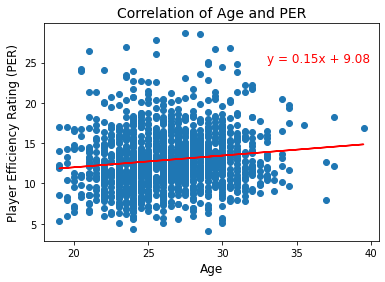

In [37]:
# Finding Linear Regression for Age and PER
x_axis = top_players["Age"]
y_axis = top_players["PER"]

(slope, intercept, r_value, p_value, std_err) = stats.linregress(x_axis,y_axis)

# Line equation to find Predcited PER
regress_value = slope*x_axis + intercept

# Line equation to print on the scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Print Coeeficient of Correlation
print(f"Coefficient of Correlation r = {round(r_value,3)}")

# Scatter plot of Age against PER
plt.scatter(top_players["Age"],top_players["PER"])

# Line plot for regerssion line
plt.plot(x_axis,regress_value, "r-")

# Display regression line
plt.annotate(line_eq,(33,25), fontsize=12, color="red")

# Labels and Titles for the plot
plt.xlabel("Age", fontsize=12)
plt.ylabel("Player Efficiency Rating (PER)", fontsize=12)
plt.title("Correlation of Age and PER", fontsize=14)

# Saving scatter plot graph into visualization folder
plt.savefig("Visualizations/Correlation of Age and PER.jpg")

# Display plot
plt.show()

# Question 3

## How does a player’s move (Top 10 only based on overall points) affect the new team’s winning percentage?

- Sort on the “Points” field to pick the top 10 Players of the previously selected years.
- Pick a player from the top 10 and we find when their team changes and for what year.
- Find the team win% for the previous year and compare both to see if the team performed better or worse


In [38]:
# Using the complete data that we merged for Question 1 
complete_nba_data.head()

,Index,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,AST,STL,BLK,TOV,PF,PTS,Team,Record,Winning Percentage,TM
0,7937,1986,John Battle,SG,23.0,ATL,64.0,0.0,639.0,11.7,...,74.0,23.0,3.0,47.0,80.0,277.0,Hawks,50-32,0.61,ATL
1,7963,1986,Antoine Carr,PF,24.0,ATL,17.0,0.0,258.0,14.4,...,14.0,7.0,15.0,14.0,51.0,116.0,Hawks,50-32,0.61,ATL
2,7973,1986,Lorenzo Charles,SF,22.0,ATL,36.0,0.0,273.0,11.5,...,8.0,2.0,6.0,18.0,37.0,122.0,Hawks,50-32,0.61,ATL
3,8000,1986,Johnny Davis,SG,30.0,ATL,27.0,7.0,402.0,13.9,...,112.0,13.0,0.0,38.0,32.0,144.0,Hawks,50-32,0.61,ATL
4,8050,1986,Scott Hastings,PF,25.0,ATL,62.0,0.0,650.0,7.5,...,26.0,14.0,8.0,40.0,118.0,193.0,Hawks,50-32,0.61,ATL


In [39]:
# In this case we only need "Year", "Player", "TM", "PTS", "Winning Percentage" to properly 
# check for what we need
player_points_data = complete_nba_data[["Year", "Player", "TM", "PTS", "Winning Percentage"]]

# We also want to remove the '*' that are present for some players in the original csv sheet (* means that they are inactive)
player_points_data["Player"] = player_points_data["Player"].str.replace("*","", regex=False)

# We sort by year so that our final dataframe is ordered by the year that person played,
# otherwise it will be whenever that person was added to the dataset which might not be accurate
player_points_data = player_points_data.sort_values(["Year"], ignore_index=True)
player_points_data

C:\Users\Jay D\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Year,Player,TM,PTS,Winning Percentage
0,1986,John Battle,ATL,277.0,0.610
1,1986,John Paxson,CHI,395.0,0.366
2,1986,Mike Smrek,CHI,108.0,0.366
3,1986,Orlando Woolridge,CHI,1448.0,0.366
4,1986,Kiki Vandeweghe,POR,1962.0,0.488
...,...,...,...,...,...
15257,2017,Shelvin Mack,UTA,430.0,0.644
15258,2017,Raul Neto,UTA,100.0,0.644
15259,2017,Jeff Withey,UTA,146.0,0.644
15260,2017,Derrick Favors,UTA,476.0,0.644


In [40]:
# Now we do a sort on the points column
sort_players_pts_data = player_points_data.sort_values(["PTS"], ascending = False, ignore_index=True)
sort_players_pts_data

,Year,Player,TM,PTS,Winning Percentage
0,1987,Michael Jordan,CHI,3041.0,0.488
1,1988,Michael Jordan,CHI,2868.0,0.610
2,2006,Kobe Bryant,LAL,2832.0,0.549
3,1990,Michael Jordan,CHI,2753.0,0.671
4,1989,Michael Jordan,CHI,2633.0,0.573
...,...,...,...,...,...
15257,1999,Brian Shaw,POR,0.0,0.700
15258,1995,Derrick Phelps,SAC,0.0,0.476
15259,2003,Guy Rucker,GSW,0.0,0.463
15260,1995,Greg Kite,NYK,0.0,0.671


In [41]:
# If we want the top 10 unique we want to drop the duplicates (while keeping the first values)
# and by using the head() we can select that data
top_10_players_pts = sort_players_pts_data.drop_duplicates(subset=["Player"], keep='first').head(10)
top_10_players_pts

,Year,Player,TM,PTS,Winning Percentage
0,1987,Michael Jordan,CHI,3041.0,0.488
2,2006,Kobe Bryant,LAL,2832.0,0.549
5,2014,Kevin Durant,OKC,2593.0,0.720
7,2017,Russell Westbrook,OKC,2558.0,0.568
9,1990,Karl Malone,UTA,2540.0,0.671
11,2006,LeBron James,CLE,2478.0,0.610
16,1986,Alex English,DEN,2414.0,0.573
17,2003,Tracy McGrady,ORL,2407.0,0.512
19,1988,Dominique Wilkins,ATL,2397.0,0.610
20,2009,Dwyane Wade,MIA,2386.0,0.524


In [42]:
# Write a loop to print top 10 players and give the user the inputs
top_10 = top_10_players_pts["Player"].tolist()
print(f"Top 10 NBA players based on points are: ")
for players in top_10:
    print(players)

Top 10 NBA players based on points are: 
Michael Jordan
Kobe Bryant
Kevin Durant
Russell Westbrook
Karl Malone
LeBron James
Alex English
Tracy McGrady
Dominique Wilkins
Dwyane Wade


In [43]:
x = 'Michael Jordan'
top_10.count(x) == 1

if  x:
    print('something')

something


In [44]:
# Here we want the user to input a name from the top 10 list
# user_input = input('Enter your player name: ')
while True:
    user_input = input('Please pick a player from the top 10:')
    try:
        value = str(user_input)
    except ValueError:
        print('Valid name, please')
        continue
    if top_10.count(user_input) == 1:
        break
    else:
        print('Invalid player')


user_input_data = player_points_data.loc[player_points_data["Player"] == user_input].reset_index()
user_input_data = user_input_data[["Year", "Player", "TM", "Winning Percentage"]]
user_input_data

Please pick a player from the top 10:Kevin Durant


,Year,Player,TM,Winning Percentage
0,2008,Kevin Durant,SEA,0.244
1,2009,Kevin Durant,OKC,0.280
2,2010,Kevin Durant,OKC,0.610
3,2011,Kevin Durant,OKC,0.671
4,2012,Kevin Durant,OKC,0.712
5,2013,Kevin Durant,OKC,0.732
6,2014,Kevin Durant,OKC,0.720
7,2015,Kevin Durant,OKC,0.549
8,2016,Kevin Durant,OKC,0.671
9,2017,Kevin Durant,GSW,0.864


In [45]:
# these variables will be used to create a summary df
new_team = []
year = []
winning_percentage = []
pvs_team_winning_percent_list = []
difference_percent = []
change = 0

# We need to manually grab the first value for user_input so we can compare it to something
old_team = user_input_data.iloc[0,2]

# We iterate through every row for a selected player while saving key values 
# We need his year, current team and and current winning percentage
# while at the same time we need to do a lookup for his new teams year and win percentage
for row,values in user_input_data.iterrows():
    if values[2] != old_team:
        newTm = values[2]
        newYr = values[0] - 1
        pv_team_Data = combined_team_data.loc[(combined_team_data['TM'] == newTm) & (combined_team_data['Year'] == newYr)]
        if (pv_team_Data.empty == False):
            pvs_team_winning_percent = pv_team_Data.values[0][3]
            pvs_team_winning_percent_list.append(pvs_team_winning_percent)
            win_Perc =  values[3] - pvs_team_winning_percent
            difference_percent.append(win_Perc)
            new_team.append(values[2])
            year.append(values[0])
            winning_percentage.append(values[3])
            old_team = values[2]
            change =+ 1

# Creating summary df to store our new data
summary = pd.DataFrame({
        'Year' : year , 
        'Team': new_team,
        'Old Winning Percent': pvs_team_winning_percent_list,
        'New Wining Percent': winning_percentage,
        'Difference' : difference_percent
})

# We only want to print the df if there is change
# NOTE: Kobe Bryant never changed
if change == 0:
    print(f"Player did not change his team")
else:
    print(summary)



   Year Team  Old Winning Percent  New Wining Percent  Difference
0  2010  OKC                 0.28               0.610       0.330
1  2017  GSW                 0.89               0.864      -0.026
